In [1]:
import pyten as ptn
import numpy as np
import sys, csv, os   
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.dirname("../codes/src")))          #used this, be careful

In [2]:
from src import helpers, utils, DMRG

Start with presentation of data stored in .dat file for a given

In [6]:
#parameters for the state to explained below
p = helpers.params();
p.target = "../codes" + "/data/dat-files-01-DMRG-table/"                 #the location dat files are stored
p.Lx=12; p.Ly=5; p.Nphi=8.; p.U=8.; p.N=int(p.Nphi); p.S=p.Nphi/2*0;
p.Y=13
print(p.Z is None)
helpers.print_DMRG_table(p)

AttributeError: 'SimpleNamespace' object has no attribute 'Z'

In [25]:
#spin-spin correlation to see long-range spin order
#load the particle density to txt file, and then to numpy array, then plot as a function of x
chis = [100, 100, 200, 200, 400, 400, 400, 800, 800, 800, 800, 1600, 1600, 1600, \
        2000, 2000, 2000, 4000, 4000, 4000, 4000, 4000, 4000]
p1=helpers.params()
p1.folder="QH_FM4"; p1.Lx=12; p1.Ly=5; p1.Nphi=(p1.Lx-1)/5*p1.Ly; p1.U=8.0; p1.N=12; p1.S=float(p1.N/2)*0; p1.pbc=True; 
p1.lat=ptn.mp.lat.su2u1.genFermiHubbardSpinCharge(p1.Lx*p1.Ly)

In [26]:
tar_loc_corr="../codes/data/dat-files-02-expc-arr/corr-func-arr/"

tar_loc_n="../codes/data/dat-files-02-expc-arr/n-arr/"

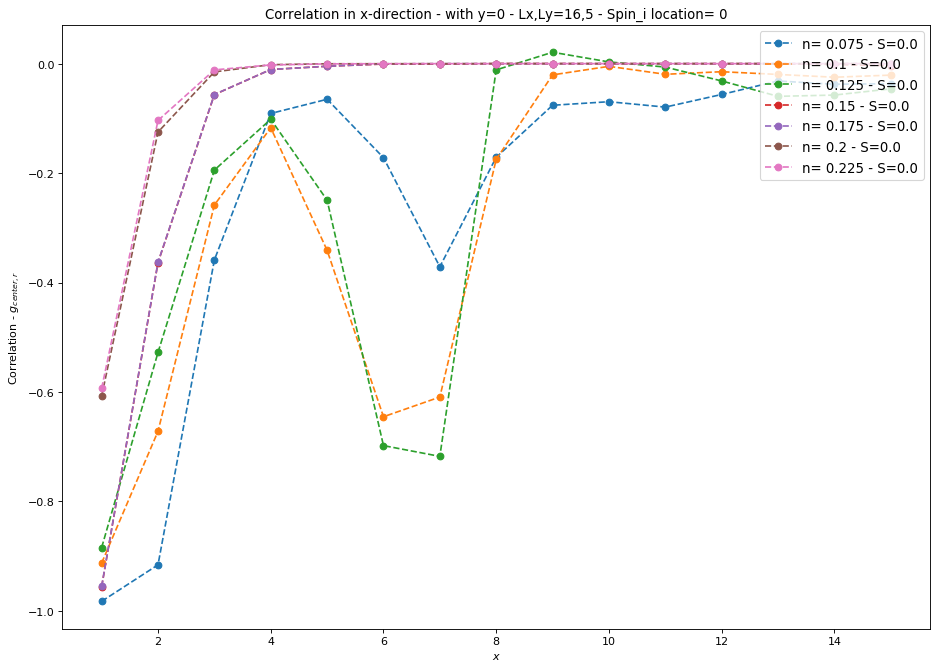

In [33]:
#plot
c_locs=[0, p1.Lx-1, p1.Lx//2]
plt.figure(figsize=(14, 10), dpi=80)
for M in np.arange(6, 20, 2):
    for s in range(1):
        for i in range(len(c_locs)-2):
            p1.N=M; i=0
            p1.S=float(p1.N/2)*s
            SS=helpers.load_arr_high_bond(p1, tar_loc_corr, chis, "ss");
            nn=helpers.load_arr_high_bond(p1, tar_loc_corr, chis, "nn");
            n = helpers.load_arr_high_bond(p1, tar_loc_n, chis, "n")
            X = SS[i, :, 1].astype(int)
            Y = SS[i, :, 0]
            Y = np.divide(Y - 3/4*nn[i, :, 0], n[X, 0])/n[c_locs[i],0] 
            Y = np.divide(nn[0, 1:, 0], n[X[1:],0])/n[0,0] - 1
            plt.plot(X[1:], Y, '--o',label="n= " + str(p1.N/(p1.Lx*p1.Ly))+ " - " + "S="+str(p1.S) )

        
        
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("$x$")
plt.ylabel("Correlation - $g_{center,r}$")
#plt.yscale('log')
y_lim = 2
#plt.ylim(-y_lim, y_lim)
plt.title("Correlation in x-direction - with y=0 - Lx,Ly=" + str(p1.Lx)+ "," + str(p1.Ly)  + " - Spin_i location= " + str(c_locs[i]))
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc ="upper right", prop={'size':12})
#plt.axhline(y=0.0, color='r', linestyle='-')

  
# To load the display window
plt.show()

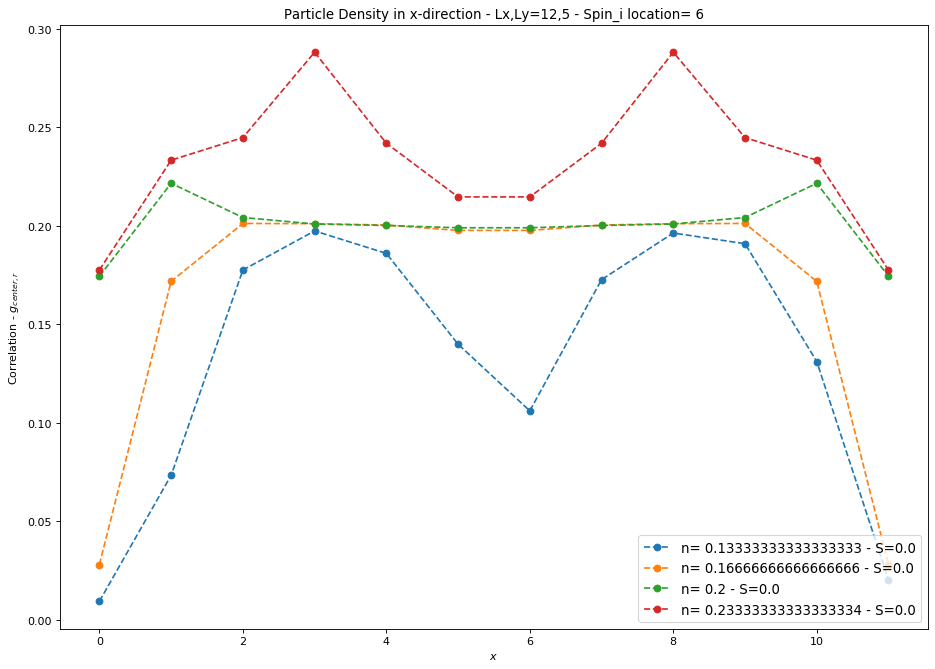

In [29]:
#plot
c_locs=[0, p1.Lx-1, p1.Lx//2]
plt.figure(figsize=(14, 10), dpi=80)
for M in np.arange(8, 16, 2):
    for s in range(1):
        p1.N=M; i=2
        #p1.Nphi=float(M)
        p1.S=float(p1.N/2)*0
        n = helpers.load_arr_high_bond(p1, tar_loc_n, chis, "n")
        X = np.arange(0, n.shape[0])
        #Y = np.sum(n, axis=1)/p1.Ly
        Y = n[:,0]
        plt.plot(X, Y, '--o',label="n= " + str(p1.N/(p1.Lx*p1.Ly))+ " - " + "S="+str(p1.S) )

        
        
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("$x$")
plt.ylabel("Correlation - $g_{center,r}$")
#plt.yscale('log')
y_lim = 2
#plt.ylim(-y_lim, y_lim)
plt.title("Particle Density in x-direction - Lx,Ly=" + str(p1.Lx)+ "," + str(p1.Ly)  + " - Spin_i location= " + str(c_locs[i]))
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc ="lower right", prop={'size':12})
#plt.axhline(y=0.0, color='r', linestyle='-')

  
# To load the display window
plt.show()